In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [27]:
img=cv2.imread("../img/forrest.jpg")

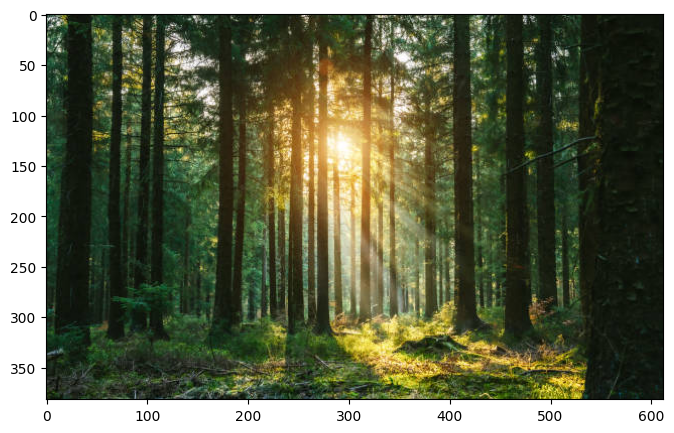

In [28]:
plt.figure(figsize=(14, 5))
# BGR to RGB [..., ::-1]
plt.imshow(img[..., ::-1])
plt.show()

In [29]:
h,w,_=np.shape(img)
data=np.reshape(img,(h*w,3))
data=np.float32(data)

In [40]:
number_clusters=5

criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_MAX_ITER,10,1.0)
flags=cv2.KMEANS_RANDOM_CENTERS
compactness,labels,centers=cv2.kmeans(data,number_clusters,None,criteria,10,flags)

centers

array([[ 39.924965,  74.34722 ,  60.374207],
       [ 86.32506 , 157.84705 , 176.20872 ],
       [ 18.783978,  34.174675,  24.99008 ],
       [ 63.57751 , 113.8129  , 115.13972 ],
       [154.89088 , 209.94994 , 223.18907 ]], dtype=float32)

In [41]:
def create_bar(h,w,color):
    bar=np.zeros((h,w,3),np.uint8)
    bar[:]=color
    r,g,b=int(color[2]),int(color[1]),int(color[0])
    return bar,(r,g,b)

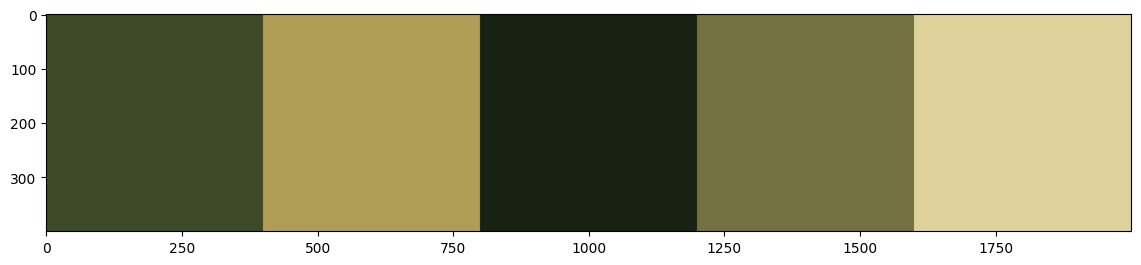

In [42]:
bars=[]
rgb_values=[]

for index,row in enumerate(centers):
    bar,rgb =create_bar(400,400,row)
    bars.append(bar)
    rgb_values.append(rgb)
img_bar=np.hstack(bars)


plt.figure(figsize=(14, 5))
# BGR to RGB [..., ::-1]
plt.imshow(img_bar[..., ::-1])
plt.show()

1. RGB[39.924965 74.34722  60.374207]
2. RGB[ 86.32506 157.84705 176.20872]
3. RGB[18.783978 34.174675 24.99008 ]
4. RGB[ 63.57751 113.8129  115.13972]
5. RGB[154.89088 209.94994 223.18907]


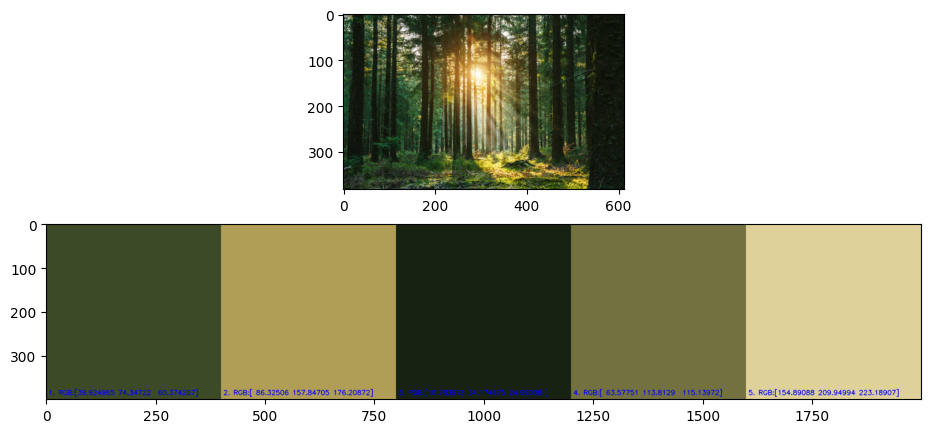

In [44]:
font=cv2.FONT_HERSHEY_SIMPLEX

for index,row in enumerate(centers):
    image=cv2.putText(img_bar,f'{index+1}. RGB:{row}',(5+400*index,400-10),
                   font,0.5,(255,0,0),1,cv2.LINE_AA)
    print(f'{index+1}. RGB{row}')
plt.figure(figsize=(14, 5))
# BGR to RGB [..., ::-1]
plt.subplot(2,1,1)
plt.imshow(img[..., ::-1])
plt.subplot(2,1,2)
plt.imshow(image[..., ::-1])
plt.show()